General Information

Download Libraries and Data

In [803]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling as pp
%matplotlib inline
import category_encoders as ce

In [804]:
df = pd.read_excel('Restavek School Attendance.xlsx')

In [805]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.columns

Index(['housheold_id', 'department', 'area',
       'main_reason_for_not_going_to_school',
       'capacity_of_reading_and_writing_of_the_head_of_household_in_which_relocated_children_were_born',
       'gender', 'age', 'religion', 'biological_parents_in_household',
       'reason_for_joining_current_household', 'wealth_quintiles',
       'gender_of_household_head', 'age_of_household_head',
       'highest_level_of_education_completed_of_household_head',
       'child_domestic_status', 'creole_literacy', 'current_school_attendance',
       'relocated_child',
       'quintile_of_mean_hours_of_working_per_day_ld21,_ld22,_ld23',
       'orphanhood', 'roster_id_of_rsi_responsent', 'roster_id',
       'mother_in_the_same_household_for_children_aged_5-17',
       'deplay_in_schooling_for_children_aged_6-17'],
      dtype='object')

Data Overview

In [806]:
df.head()

,housheold_id,department,area,main_reason_for_not_going_to_school,capacity_of_reading_and_writing_of_the_head_of_household_in_which_relocated_children_were_born,gender,age,religion,biological_parents_in_household,reason_for_joining_current_household,...,child_domestic_status,creole_literacy,current_school_attendance,relocated_child,"quintile_of_mean_hours_of_working_per_day_ld21,_ld22,_ld23",orphanhood,roster_id_of_rsi_responsent,roster_id,mother_in_the_same_household_for_children_aged_5-17,deplay_in_schooling_for_children_aged_6-17
0,HH_key,DepartementCode,Area,AE20,HT71,HR04,HR05,HR06,SM25,SM31,...,CDS,lit_creole,CSA,relochd,QuinWorkLoad,Orphanhood,AS11,HR01,SM07,schdelay
1,1001_1309,Northeast,Urban,Do not have money for school fees,Yes,Female,28,Catholic,NaN,NaN,...,NaN,Literate,NaN,NaN,NaN,NaN,3,1,NaN,NaN
2,1001_1309,Northeast,Urban,Do not have money for school fees,Yes,Male,30,Catholic,NaN,NaN,...,NaN,Literate,NaN,NaN,NaN,NaN,3,2,NaN,NaN
3,1001_1309,Northeast,Urban,Do not have money for school fees,Yes,Female,17,Catholic,No,Death of parent,...,Non-servant child,NaN,Not attending school,Yes,Upper 5,Double,3,3,NaN,No
4,1002_1374,Northeast,Urban,NaN,Yes,Female,46,Other Christian,NaN,NaN,...,NaN,Literate,NaN,NaN,NaN,NaN,3,1,NaN,NaN


In [807]:
df = df.iloc[1:,:]
df.head()

,housheold_id,department,area,main_reason_for_not_going_to_school,capacity_of_reading_and_writing_of_the_head_of_household_in_which_relocated_children_were_born,gender,age,religion,biological_parents_in_household,reason_for_joining_current_household,...,child_domestic_status,creole_literacy,current_school_attendance,relocated_child,"quintile_of_mean_hours_of_working_per_day_ld21,_ld22,_ld23",orphanhood,roster_id_of_rsi_responsent,roster_id,mother_in_the_same_household_for_children_aged_5-17,deplay_in_schooling_for_children_aged_6-17
1,1001_1309,Northeast,Urban,Do not have money for school fees,Yes,Female,28,Catholic,NaN,NaN,...,NaN,Literate,NaN,NaN,NaN,NaN,3,1,NaN,NaN
2,1001_1309,Northeast,Urban,Do not have money for school fees,Yes,Male,30,Catholic,NaN,NaN,...,NaN,Literate,NaN,NaN,NaN,NaN,3,2,NaN,NaN
3,1001_1309,Northeast,Urban,Do not have money for school fees,Yes,Female,17,Catholic,No,Death of parent,...,Non-servant child,NaN,Not attending school,Yes,Upper 5,Double,3,3,NaN,No
4,1002_1374,Northeast,Urban,NaN,Yes,Female,46,Other Christian,NaN,NaN,...,NaN,Literate,NaN,NaN,NaN,NaN,3,1,NaN,NaN
5,1002_1374,Northeast,Urban,NaN,Yes,Male,22,Voodooist,NaN,NaN,...,NaN,Literate,NaN,NaN,NaN,NaN,3,2,NaN,NaN


In [808]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10876 entries, 1 to 10876
Data columns (total 24 columns):
housheold_id                                                                                      10876 non-null object
department                                                                                        10876 non-null object
area                                                                                              10876 non-null object
main_reason_for_not_going_to_school                                                               2442 non-null object
capacity_of_reading_and_writing_of_the_head_of_household_in_which_relocated_children_were_born    4768 non-null object
gender                                                                                            10876 non-null object
age                                                                                               10875 non-null object
religion                                             

In [809]:
df.describe()

,housheold_id,department,area,main_reason_for_not_going_to_school,capacity_of_reading_and_writing_of_the_head_of_household_in_which_relocated_children_were_born,gender,age,religion,biological_parents_in_household,reason_for_joining_current_household,...,child_domestic_status,creole_literacy,current_school_attendance,relocated_child,"quintile_of_mean_hours_of_working_per_day_ld21,_ld22,_ld23",orphanhood,roster_id_of_rsi_responsent,roster_id,mother_in_the_same_household_for_children_aged_5-17,deplay_in_schooling_for_children_aged_6-17
count,10876,10876,10876,2442,4768,10876,10875,10852,3533,974,...,3504,6068,3531,3533,3436,3533,9501,10876,3202,3533
unique,2078,11,2,12,2,2,95,9,2,12,...,2,3,2,2,5,5,14,18,2,3
top,5227_582,Metropolitan,Rural,Do not have money for school fees,Yes,Female,14,Catholic,Yes,Economic problems in former household,...,Non-servant child,Literate,Attending school,No,Lower 1,No,4,1,Yes,Yes
freq,18,2393,6653,1158,3023,5734,318,4950,2066,213,...,2777,2838,2629,2066,1069,2738,1948,2168,1928,2702


Data Cleaning

In [810]:
df = df[df['roster_id_of_rsi_responsent'] == df['roster_id']]

In [811]:
pd.crosstab(df['roster_id_of_rsi_responsent'], [df['roster_id']], dropna=False)

roster_id,1,2,3,4,5,6,7,8,9,10,11,13,17
roster_id_of_rsi_responsent,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,139,0,0,0,0,0,0,0,0,0,0,0
3,0,0,419,0,0,0,0,0,0,0,0,0,0
4,0,0,0,375,0,0,0,0,0,0,0,0,0
5,0,0,0,0,294,0,0,0,0,0,0,0,0
6,0,0,0,0,0,175,0,0,0,0,0,0,0
7,0,0,0,0,0,0,109,0,0,0,0,0,0
8,0,0,0,0,0,0,0,51,0,0,0,0,0
9,0,0,0,0,0,0,0,0,32,0,0,0,0


In [812]:
pp.ProfileReport(df)

Number of variables,25
Number of observations,1617
Total Missing (%),12.1%
Total size in memory,315.9 KiB
Average record size in memory,200.0 B
Numeric,4
Categorical,20
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [813]:
df['capacity_of_reading_and_writing_of_the_head_of_household_in_which_relocated_children_were_born'].value_counts(dropna = False)

NaN    794
Yes    509
No     314
Name: capacity_of_reading_and_writing_of_the_head_of_household_in_which_relocated_children_were_born, dtype: int64

In [814]:
df = df.drop(['capacity_of_reading_and_writing_of_the_head_of_household_in_which_relocated_children_were_born'],
            axis = 1)

In [815]:
df['child_domestic_status'].value_counts(dropna = False)

Non-servant child         1117
Child domestic servant     482
NaN                         18
Name: child_domestic_status, dtype: int64

In [816]:
df['child_domestic_status'] = df['child_domestic_status'].fillna('Non-servant child')

In [817]:
pd.crosstab(df['main_reason_for_not_going_to_school'], [df['current_school_attendance']], dropna=False)

current_school_attendance,Attending school,Not attending school
main_reason_for_not_going_to_school,,
Do not have money for school fees,2,186
Do not have necessary ID-papers,0,8
Do not have time,0,2
Finished school,0,1
No money for additional school cost,2,45
No school nearby,0,2
Not allowed by people in household,0,21
Not interested,0,12
Other,3,35


In [818]:
df['main_reason_for_not_going_to_school'] = df['main_reason_for_not_going_to_school'].fillna('Attending School')
pd.crosstab(df['main_reason_for_not_going_to_school'], [df['current_school_attendance']], dropna=False)

current_school_attendance,Attending school,Not attending school
main_reason_for_not_going_to_school,,
Attending School,1174,34
Do not have money for school fees,2,186
Do not have necessary ID-papers,0,8
Do not have time,0,2
Finished school,0,1
No money for additional school cost,2,45
No school nearby,0,2
Not allowed by people in household,0,21
Not interested,0,12


In [819]:
df  = df[(df.main_reason_for_not_going_to_school!= 'Attending School') |
         (df.current_school_attendance!= 'Not attending school')]

In [820]:
pd.crosstab(df['main_reason_for_not_going_to_school'], [df['current_school_attendance']], dropna=False)

current_school_attendance,Attending school,Not attending school
main_reason_for_not_going_to_school,,
Attending School,1174,0
Do not have money for school fees,2,186
Do not have necessary ID-papers,0,8
Do not have time,0,2
Finished school,0,1
No money for additional school cost,2,45
No school nearby,0,2
Not allowed by people in household,0,21
Not interested,0,12


In [821]:
pd.crosstab(df['reason_for_joining_current_household'], [df['relocated_child']], dropna=False)

relocated_child,No,Yes
reason_for_joining_current_household,,
Death of parent,0,89
Economic problems in former household,0,157
Health problems in former household,0,16
Other,0,55
Relocated after earthquake,0,3
Social problems in former household,0,106
To bring joy to the household,0,32
To do domestic work,0,71
To find work,0,2


In [822]:
df['reason_for_joining_current_household'] = df['reason_for_joining_current_household'].fillna('Born in Current HH')

In [823]:
pd.crosstab(df['reason_for_joining_current_household'], [df['relocated_child']], dropna=False)

relocated_child,No,Yes
reason_for_joining_current_household,,
Born in Current HH,657,296
Death of parent,0,89
Economic problems in former household,0,157
Health problems in former household,0,16
Other,0,55
Relocated after earthquake,0,3
Social problems in former household,0,106
To bring joy to the household,0,32
To do domestic work,0,71


In [824]:
df['creole_literacy'].value_counts(dropna = False)

NaN    1583
Name: creole_literacy, dtype: int64

In [825]:
df = df.drop(['creole_literacy'], axis = 1)

In [826]:
df = df.drop(['biological_parents_in_household'], axis = 1)

In [827]:
df['mother_in_the_same_household_for_children_aged_5-17'].value_counts(dropna = False)

No     781
Yes    591
NaN    211
Name: mother_in_the_same_household_for_children_aged_5-17, dtype: int64

In [828]:
df = df.drop(['mother_in_the_same_household_for_children_aged_5-17'], axis = 1)

In [829]:
df['deplay_in_schooling_for_children_aged_6-17'].value_counts()

Yes    1232
No      349
9         2
Name: deplay_in_schooling_for_children_aged_6-17, dtype: int64

In [830]:
def date_clean(x):
    if x == 9:
        return 'Yes'
    else:
        return x

In [831]:
df['deplay_in_schooling_for_children_aged_6-17'] = df['deplay_in_schooling_for_children_aged_6-17'].apply(lambda x: date_clean(x))

In [832]:
for x in df.columns:
    if x == 'housheold_id':
        pass
    else:
        y = df[x].mode().iloc[0]
        df[x] = df[x].fillna(y)

In [833]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1583 entries, 3 to 10876
Data columns (total 20 columns):
housheold_id                                                  1583 non-null object
department                                                    1583 non-null object
area                                                          1583 non-null object
main_reason_for_not_going_to_school                           1583 non-null object
gender                                                        1583 non-null object
age                                                           1583 non-null int64
religion                                                      1583 non-null object
reason_for_joining_current_household                          1583 non-null object
wealth_quintiles                                              1583 non-null object
gender_of_household_head                                      1583 non-null object
age_of_household_head                                         1

In [834]:
def age_bkt(x):
    if x < 7:
        return '5-6'
    elif x < 10:
        return '7-9'
    elif x < 13:
        return '10-12'
    elif x < 17:
        return '13-16'
    else:
        return '17'

In [835]:
df['age_2'] = df['age'].apply(lambda x: age_bkt(x))

Data Analysis

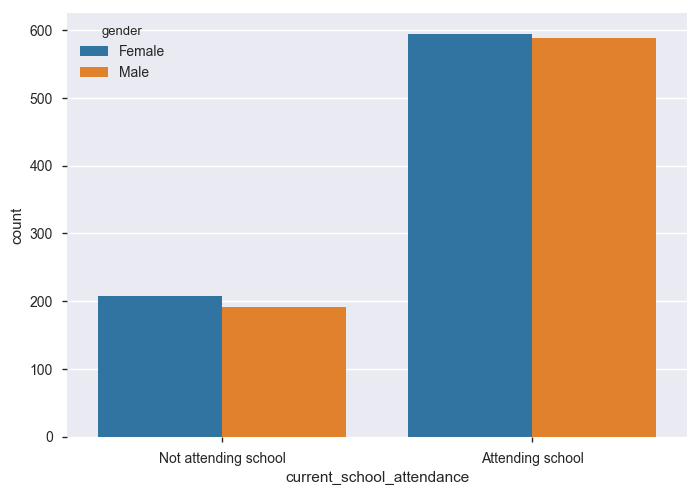

In [836]:
sns.countplot(data = df, x = 'current_school_attendance', hue = 'gender')

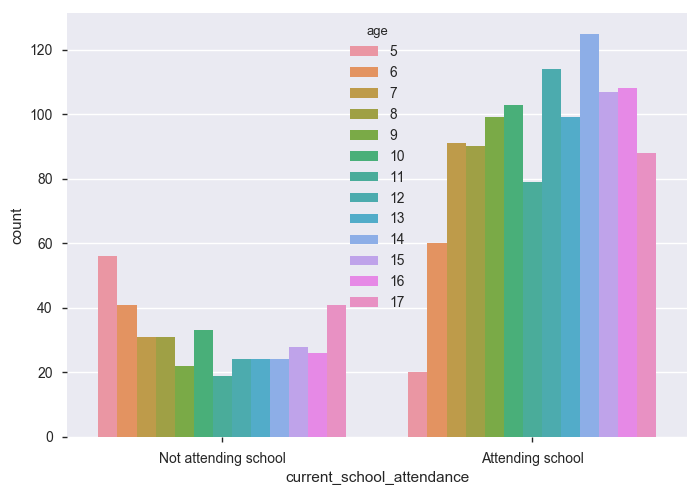

In [837]:
sns.countplot(data = df, x = 'current_school_attendance', hue = 'age')

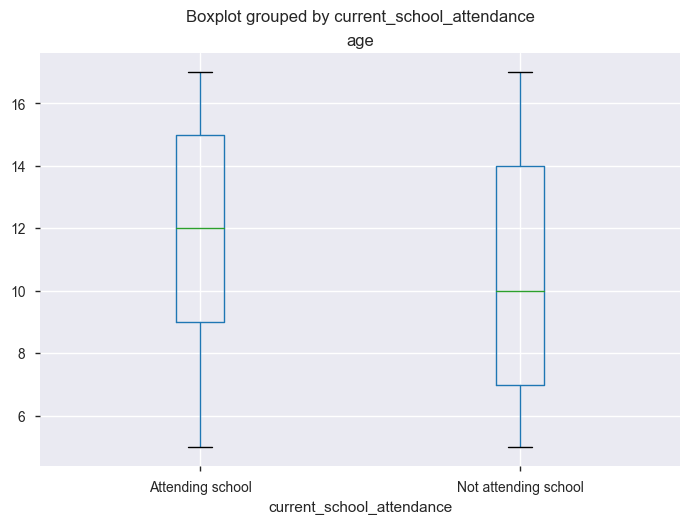

In [838]:
df.boxplot('age', 'current_school_attendance')

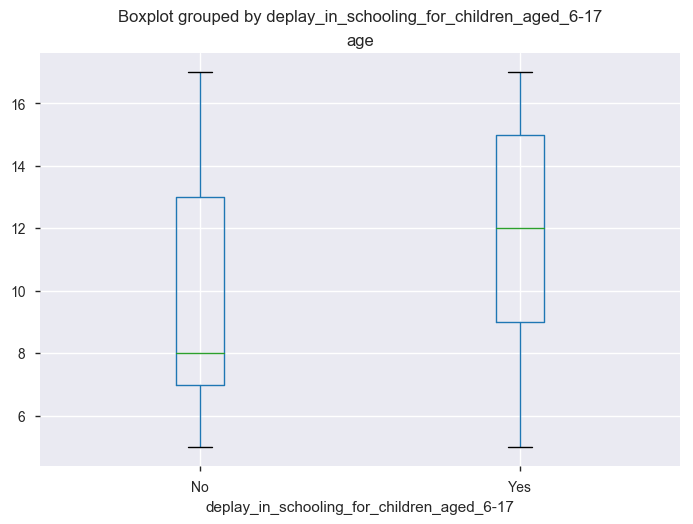

In [839]:
df.boxplot('age', 'deplay_in_schooling_for_children_aged_6-17')

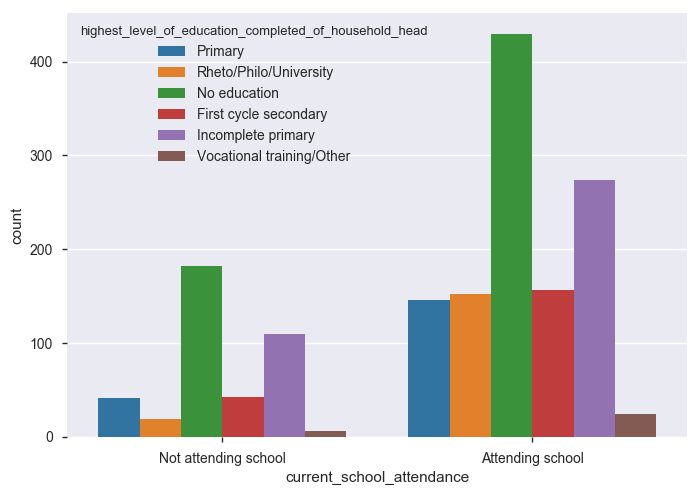

In [840]:
sns.countplot(data = df, x = 'current_school_attendance', 
              hue = 'highest_level_of_education_completed_of_household_head')

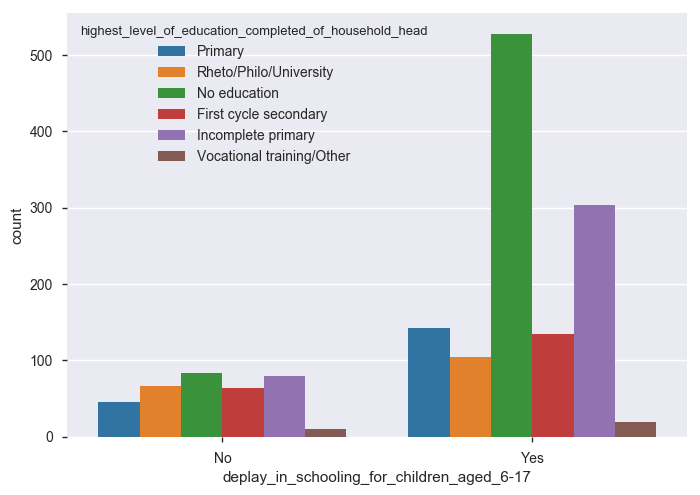

In [841]:
sns.countplot(data = df, x = 'deplay_in_schooling_for_children_aged_6-17', 
              hue = 'highest_level_of_education_completed_of_household_head')

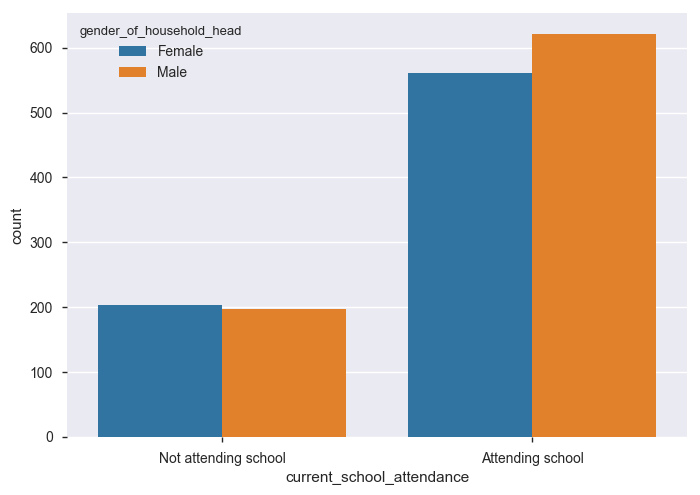

In [842]:
sns.countplot(data = df, x = 'current_school_attendance', 
              hue = 'gender_of_household_head')

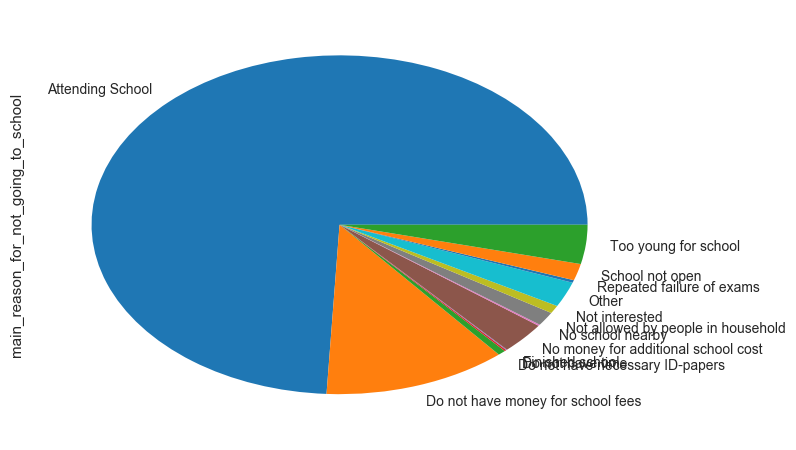

In [843]:
df.main_reason_for_not_going_to_school.groupby(df.main_reason_for_not_going_to_school).count().plot(kind='pie')

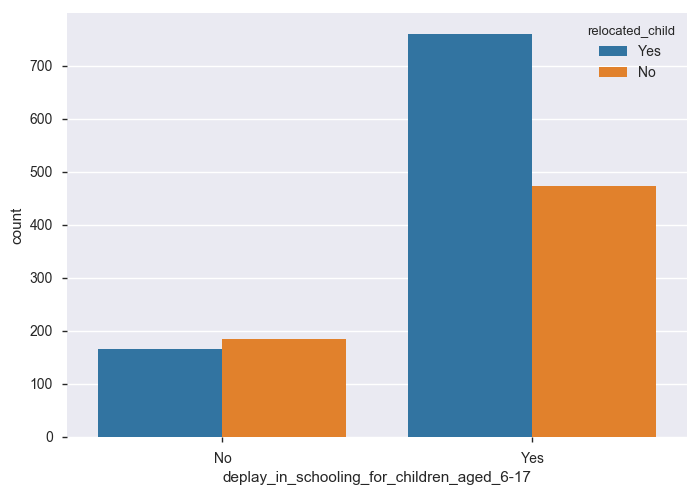

In [844]:
sns.countplot(data = df, x = 'deplay_in_schooling_for_children_aged_6-17',
              hue = 'relocated_child')

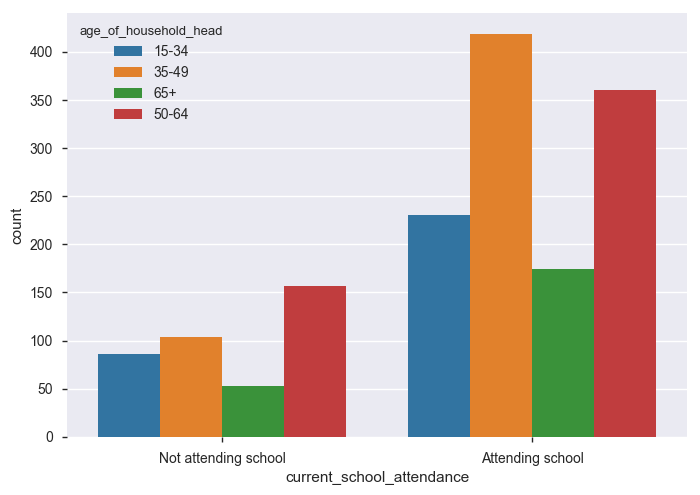

In [845]:
sns.countplot(data = df, x = 'current_school_attendance', hue = 'age_of_household_head')

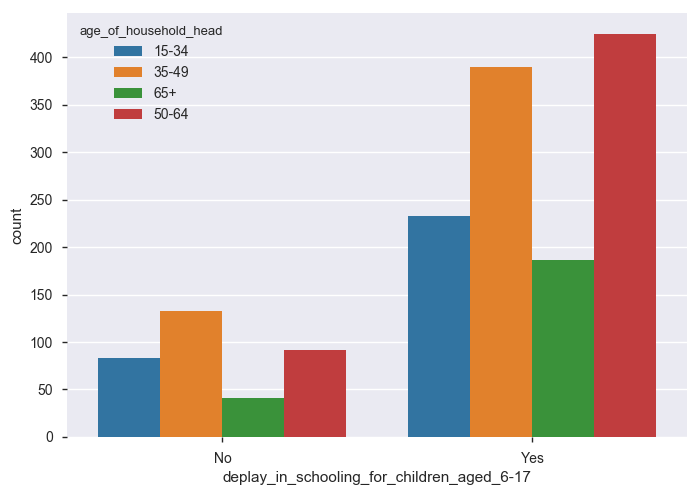

In [846]:
sns.countplot(data = df, x = 'deplay_in_schooling_for_children_aged_6-17', hue = 'age_of_household_head')

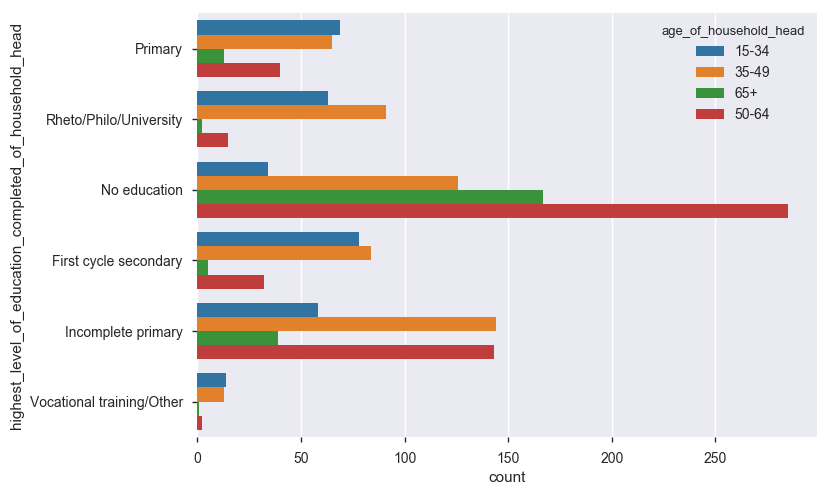

In [847]:
sns.countplot(data = df, y = 'highest_level_of_education_completed_of_household_head', 
              hue = 'age_of_household_head')

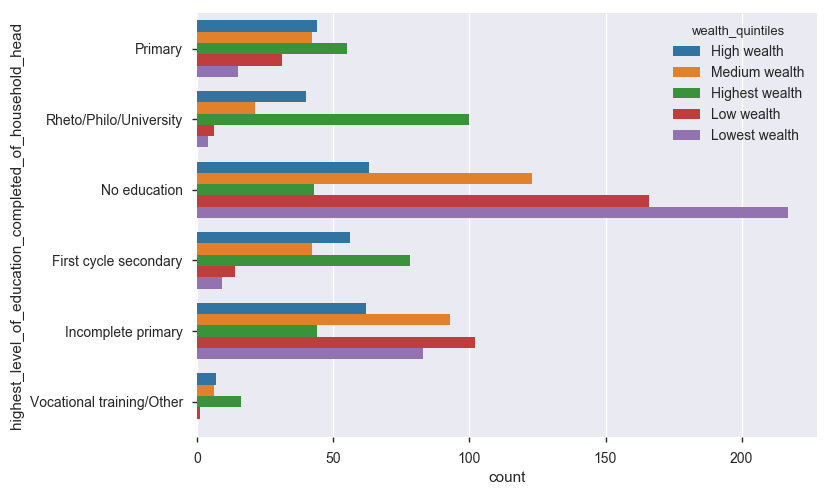

In [848]:
sns.countplot(data = df, y = 'highest_level_of_education_completed_of_household_head', 
              hue = 'wealth_quintiles')

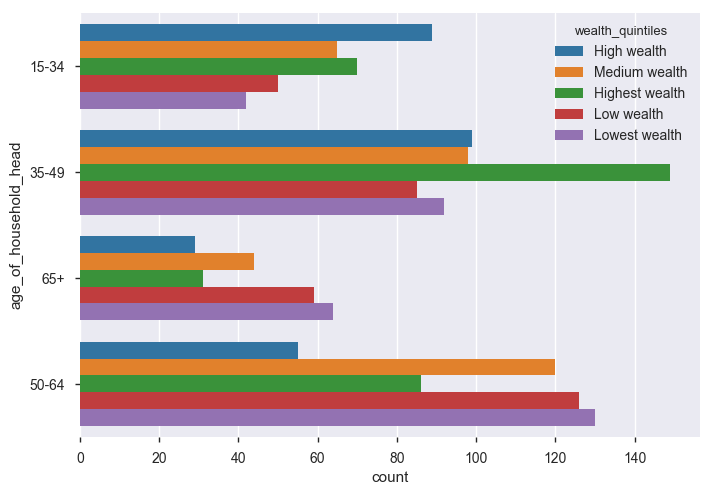

In [849]:
sns.countplot(data = df, y = 'age_of_household_head', 
              hue = 'wealth_quintiles')

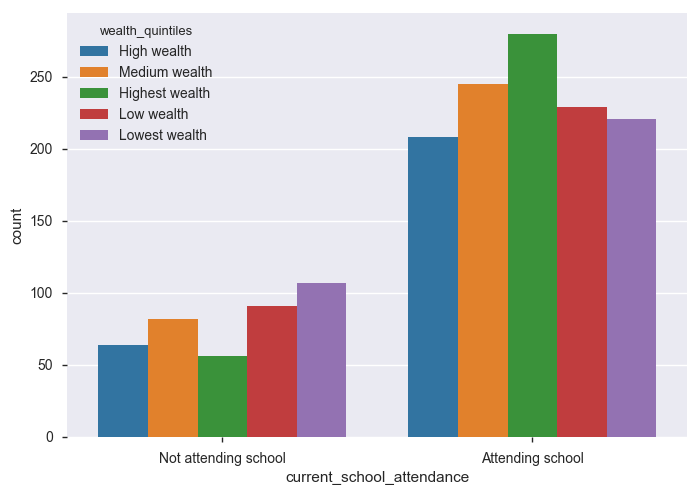

In [850]:
sns.countplot(data = df, x = 'current_school_attendance', hue = 'wealth_quintiles')

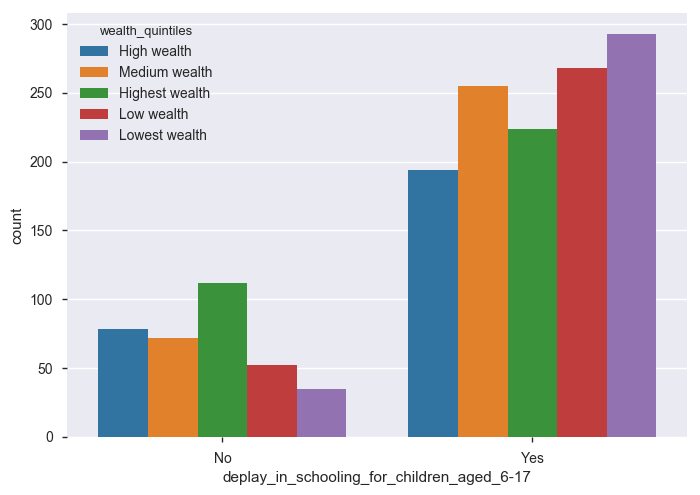

In [851]:
sns.countplot(data = df, x = 'deplay_in_schooling_for_children_aged_6-17', hue = 'wealth_quintiles')

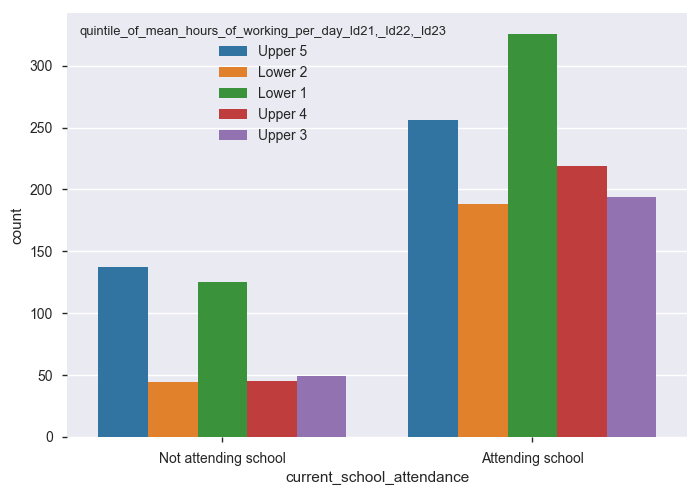

In [852]:
sns.countplot(data = df, x = 'current_school_attendance', 
              hue = 'quintile_of_mean_hours_of_working_per_day_ld21,_ld22,_ld23')

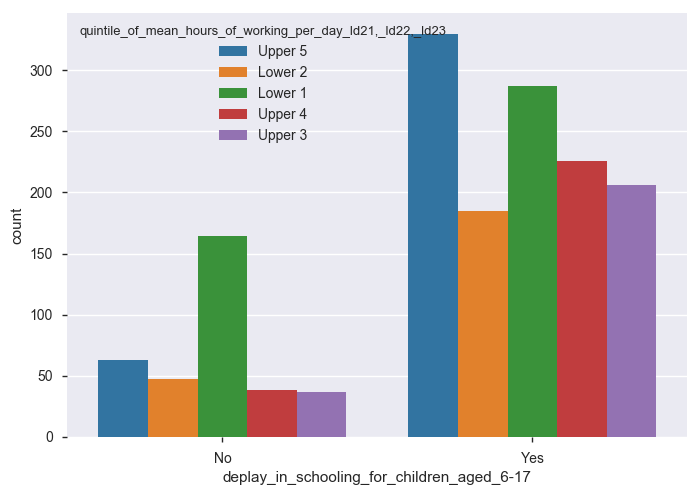

In [853]:
sns.countplot(data = df, x = 'deplay_in_schooling_for_children_aged_6-17', 
              hue = 'quintile_of_mean_hours_of_working_per_day_ld21,_ld22,_ld23')

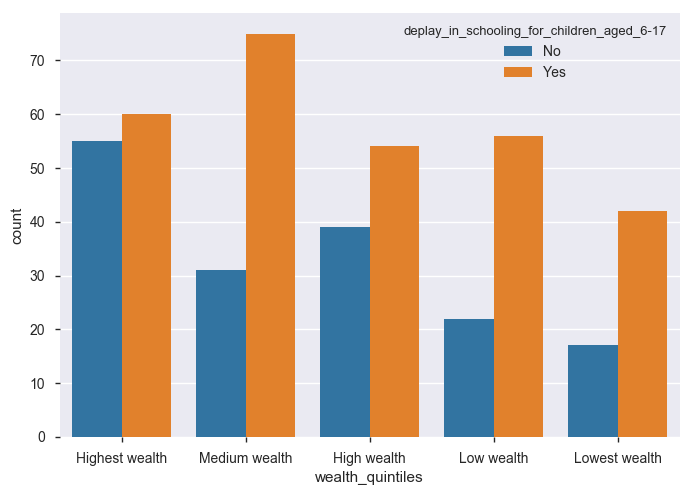

In [854]:
df_work = df[df['quintile_of_mean_hours_of_working_per_day_ld21,_ld22,_ld23']=='Lower 1']
sns.countplot(data = df_work, x = 'wealth_quintiles', 
              hue = 'deplay_in_schooling_for_children_aged_6-17')

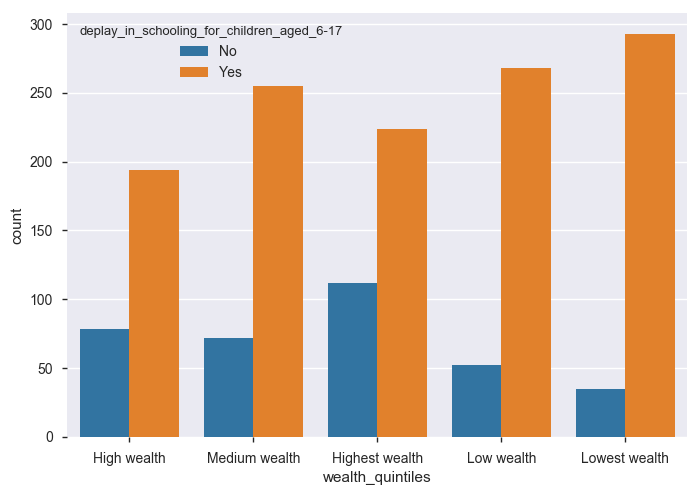

In [855]:
sns.countplot(data = df, x = 'wealth_quintiles', 
              hue = 'deplay_in_schooling_for_children_aged_6-17')

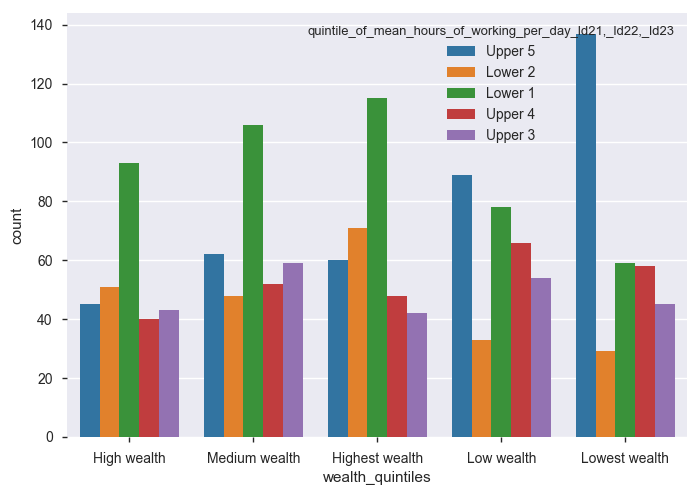

In [856]:
sns.countplot(data = df, x = 'wealth_quintiles', 
              hue = 'quintile_of_mean_hours_of_working_per_day_ld21,_ld22,_ld23')

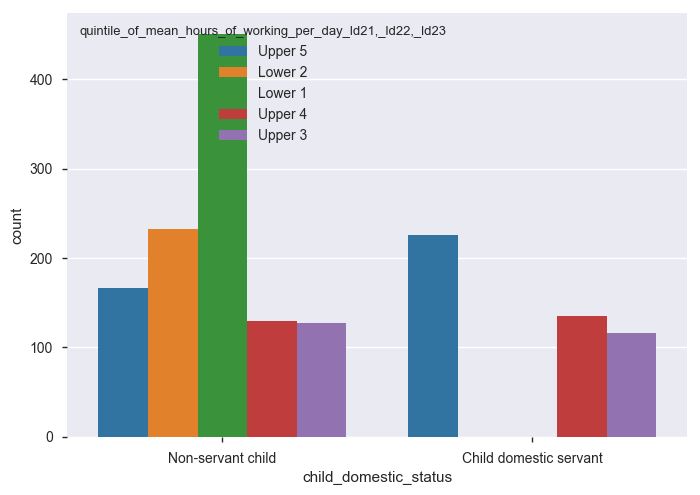

In [857]:
sns.countplot(data = df, x = 'child_domestic_status', 
              hue = 'quintile_of_mean_hours_of_working_per_day_ld21,_ld22,_ld23')

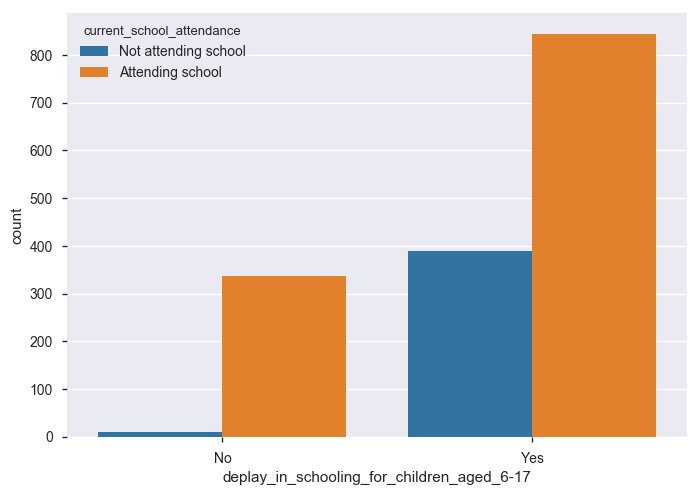

In [858]:
sns.countplot(data = df, x = 'deplay_in_schooling_for_children_aged_6-17', 
              hue = 'current_school_attendance')

Modeling

In [859]:
df = df.drop(['current_school_attendance'], axis=1)
df = df.drop(['child_domestic_status'], axis=1)
df = df.drop(['main_reason_for_not_going_to_school'], axis=1)
df = df.drop(['age'], axis=1)
df = df.drop(['housheold_id'], axis=1)
df = df.drop(['roster_id_of_rsi_responsent'], axis=1)
df = df.drop(['roster_id'], axis=1)

In [860]:
df.head()

,department,area,gender,religion,reason_for_joining_current_household,wealth_quintiles,gender_of_household_head,age_of_household_head,highest_level_of_education_completed_of_household_head,relocated_child,"quintile_of_mean_hours_of_working_per_day_ld21,_ld22,_ld23",orphanhood,deplay_in_schooling_for_children_aged_6-17,age_2
3,Northeast,Urban,Female,Catholic,Death of parent,High wealth,Female,15-34,Primary,Yes,Upper 5,Double,No,17
6,Northeast,Urban,Male,Other Christian,Social problems in former household,Medium wealth,Female,35-49,Rheto/Philo/University,Yes,Lower 2,No,Yes,13-16
10,Northeast,Urban,Male,Catholic,Born in Current HH,Highest wealth,Female,15-34,Rheto/Philo/University,Yes,Lower 1,Double,No,17
17,Northeast,Urban,Male,Catholic,Born in Current HH,Highest wealth,Female,65+,No education,Yes,Upper 5,No,Yes,13-16
24,Northeast,Urban,Female,Protestant,Death of parent,Highest wealth,Female,15-34,Rheto/Philo/University,Yes,Lower 2,Double,Yes,7-9


In [861]:
df = df[['department', 'area', 'gender', 'religion',
       'reason_for_joining_current_household', 'wealth_quintiles',
       'gender_of_household_head', 'age_of_household_head',
       'highest_level_of_education_completed_of_household_head',
       'relocated_child',
       'quintile_of_mean_hours_of_working_per_day_ld21,_ld22,_ld23', 'age_2',
       'orphanhood', 'deplay_in_schooling_for_children_aged_6-17']]

In [862]:
X = df.iloc[:,:13]
Y = df.iloc[:,13:]

In [863]:
df.dtypes

department                                                    object
area                                                          object
gender                                                        object
religion                                                      object
reason_for_joining_current_household                          object
wealth_quintiles                                              object
gender_of_household_head                                      object
age_of_household_head                                         object
highest_level_of_education_completed_of_household_head        object
relocated_child                                               object
quintile_of_mean_hours_of_working_per_day_ld21,_ld22,_ld23    object
age_2                                                         object
orphanhood                                                    object
deplay_in_schooling_for_children_aged_6-17                    object
dtype: object

In [864]:
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
X = ohe.fit_transform(X)
X.head()

,department_Northeast,department_North,department_Nippes,department_South,department_Grand Anse,department_Artibonite,department_Centre,department_Northwest,department_West,department_Southeast,...,age_2_17,age_2_13-16,age_2_7-9,age_2_10-12,age_2_5-6,orphanhood_Double,orphanhood_No,orphanhood_Do not know,orphanhood_Paternal,orphanhood_Maternal
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
10,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
17,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
24,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [865]:
X.columns

Index(['department_Northeast', 'department_North', 'department_Nippes',
       'department_South', 'department_Grand Anse', 'department_Artibonite',
       'department_Centre', 'department_Northwest', 'department_West',
       'department_Southeast', 'department_Metropolitan', 'area_Urban',
       'area_Rural', 'gender_Female', 'gender_Male', 'religion_Catholic',
       'religion_Other Christian', 'religion_Protestant', 'religion_Baptist',
       'religion_No religion', 'religion_Voodooist',
       'religion_Jehovah's witness',
       'reason_for_joining_current_household_Death of parent',
       'reason_for_joining_current_household_Social problems in former household',
       'reason_for_joining_current_household_Born in Current HH',
       'reason_for_joining_current_household_To go to school',
       'reason_for_joining_current_household_Economic problems in former household',
       'reason_for_joining_current_household_To do domestic work',
       'reason_for_joining_current_hous

In [866]:
X1 = X.drop(['department_Northeast', 'religion_Catholic', 'reason_for_joining_current_household_Death of parent',
             'area_Urban', 'gender_Female', 'wealth_quintiles_High wealth', 
             'gender_of_household_head_Female', 'age_of_household_head_65+', 
             'highest_level_of_education_completed_of_household_head_Primary',
             'relocated_child_Yes', 'quintile_of_mean_hours_of_working_per_day_ld21,_ld22,_ld23_Upper 5',
             'orphanhood_Double', 'age_2_13-16'], axis =1)

In [867]:
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
Y = ohe.fit_transform(Y)
Y1 = Y.iloc[:,1:]
Y1.head()

,deplay_in_schooling_for_children_aged_6-17_Yes
3,0
6,1
10,0
17,1
24,1


In [868]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.25, random_state = 0)

In [869]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [870]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [871]:
c, r = y_train.shape
y_train = y_train.values.reshape(c,)
y_train

array([1, 1, 1, ..., 1, 0, 1])

In [872]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
stdev = accuracies.std()
mean = accuracies.mean()

In [873]:
accuracy = 'K-Nearest Neighbors accuracy is %d and Std Dev is %d.'

In [874]:
print(accuracy % (int(mean*100), stdev*100))

K-Nearest Neighbors accuracy is 76 and Std Dev is 2.


See the below link for a more in depth look at the types of distance metrics

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

In [875]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.25, random_state = 0)

In [876]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [877]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [878]:
from sklearn.grid_search import RandomizedSearchCV
from sklearn.grid_search import GridSearchCV

In [879]:
params = {"n_neighbors": np.arange(1, 20),
          "metric": ['euclidean', 'manhattan', 'chebyshev','minkowski']}

In [880]:
c, r = y_train.shape
y_train = y_train.values.reshape(c,)
y_train

array([1, 1, 1, ..., 1, 0, 1])

In [881]:
print("[INFO] tuning hyperparameters via grid search")
model = KNeighborsClassifier(n_jobs=1)
grid = GridSearchCV(model, params)
grid.fit(X_train, y_train)
 
# evaluate the best grid searched model on the testing data
acc = grid.score(X_test, y_test)
print("[INFO] grid search accuracy: {:.2f}%".format(acc * 100))
print("[INFO] grid search best parameters: {}".format(grid.best_params_))

[INFO] tuning hyperparameters via grid search
[INFO] grid search accuracy: 77.53%
[INFO] grid search best parameters: {'metric': 'euclidean', 'n_neighbors': 17}


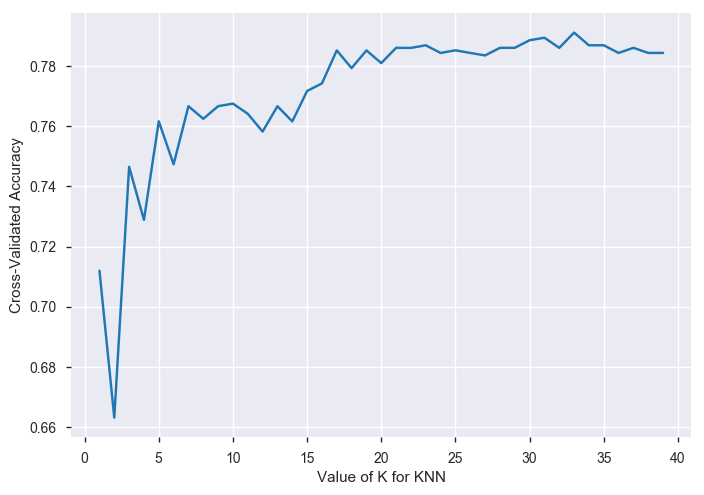

In [882]:
k_range = range(1, 40)

# list of scores from k_range
k_scores = []


# 1. we will loop through reasonable values of k
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean', p = 2)
    classifier.fit(X_train, y_train)
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    stdev = accuracies.std()
    mean = accuracies.mean()
    k_scores.append(mean)
    
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

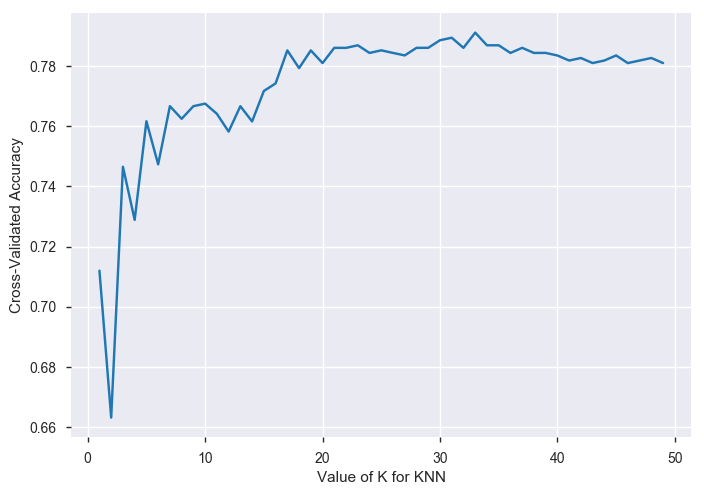

In [883]:
k_range = range(1, 50)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    stdev = accuracies.std()
    mean = accuracies.mean()
    k_scores.append(mean)
    
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [884]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.25, random_state = 0)

In [885]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [886]:
c, r = y_train.shape
y_train = y_train.values.reshape(c,)
y_train

array([1, 1, 1, ..., 1, 0, 1])

In [887]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
stdev = accuracies.std()
mean = accuracies.mean()

In [888]:
accuracy = 'K-Nearest Neighbors accuracy is %d and Std Dev is %d.'

In [889]:
print(accuracy % (int(mean*100), stdev*100))

K-Nearest Neighbors accuracy is 78 and Std Dev is 0.


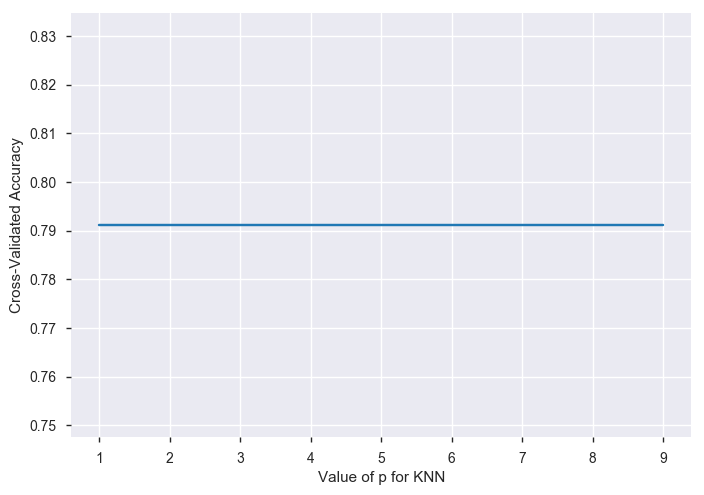

In [890]:
k_range = range(1, 10)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = 33, metric = 'euclidean', p = k)
    classifier.fit(X_train, y_train)
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    stdev = accuracies.std()
    mean = accuracies.mean()
    k_scores.append(mean)
    
plt.plot(k_range, k_scores)
plt.xlabel('Value of p for KNN')
plt.ylabel('Cross-Validated Accuracy')

Conclusions